<a href="https://colab.research.google.com/github/tonycico0912/ChatGPT_Python/blob/main/GOOGLE_STOCK_PRICE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CSV 파일을 업로드하세요.


Saving GOOG.csv to GOOG (4).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


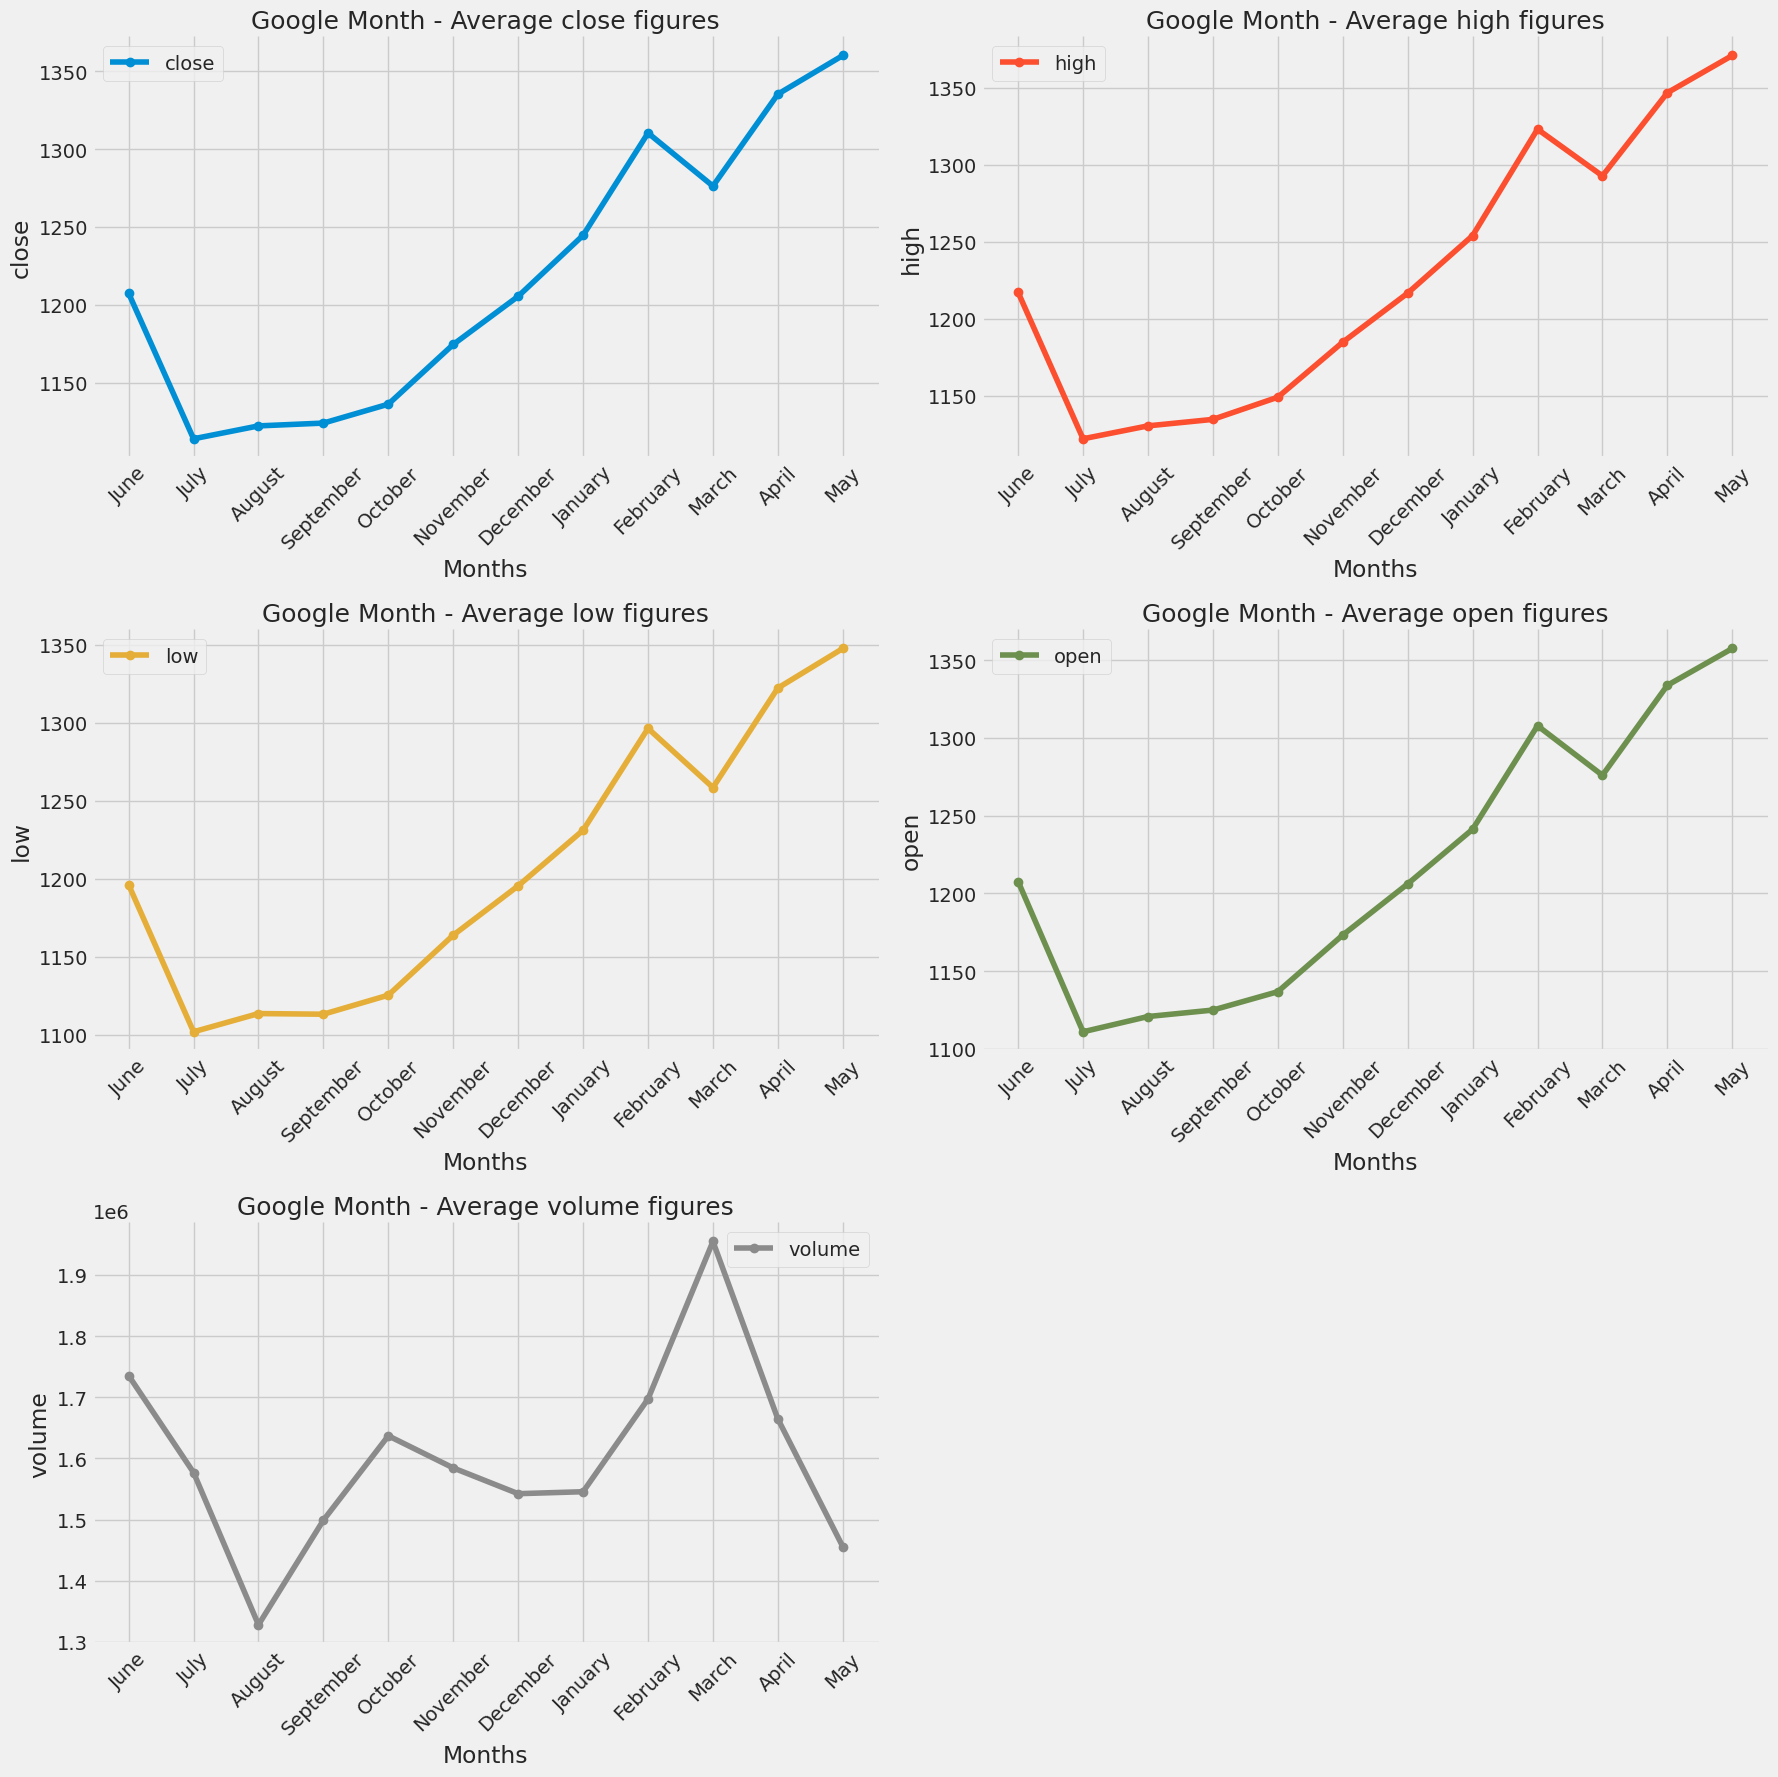

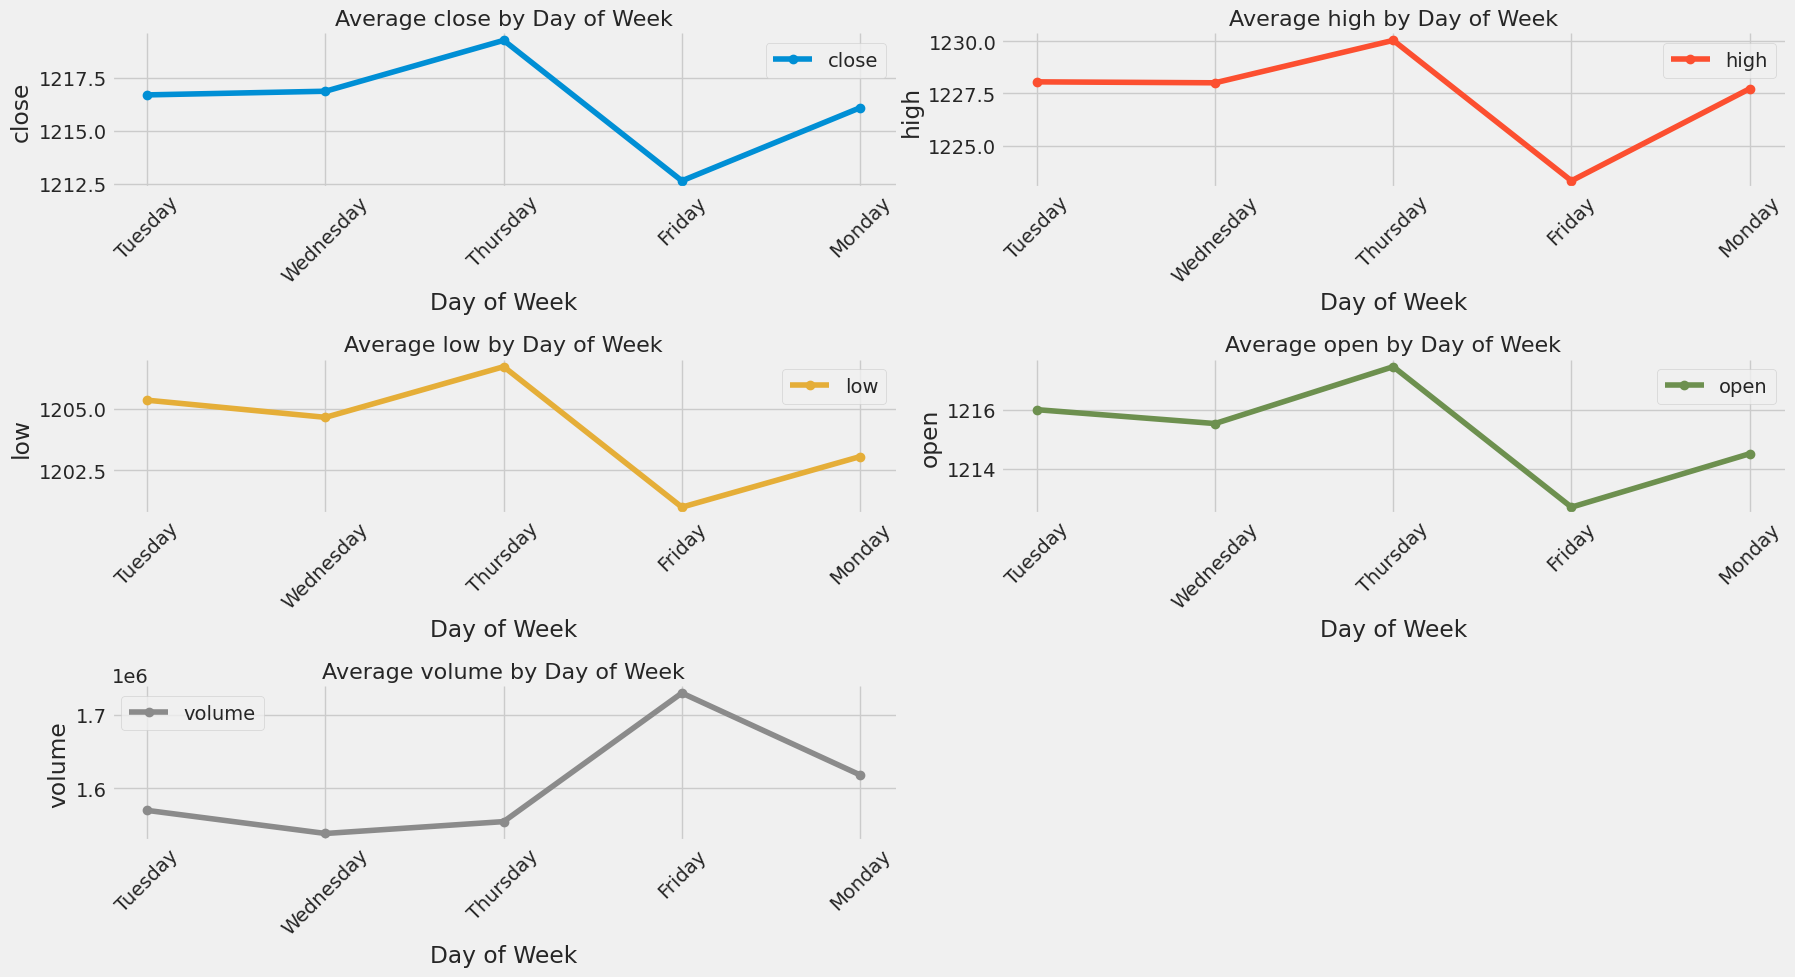

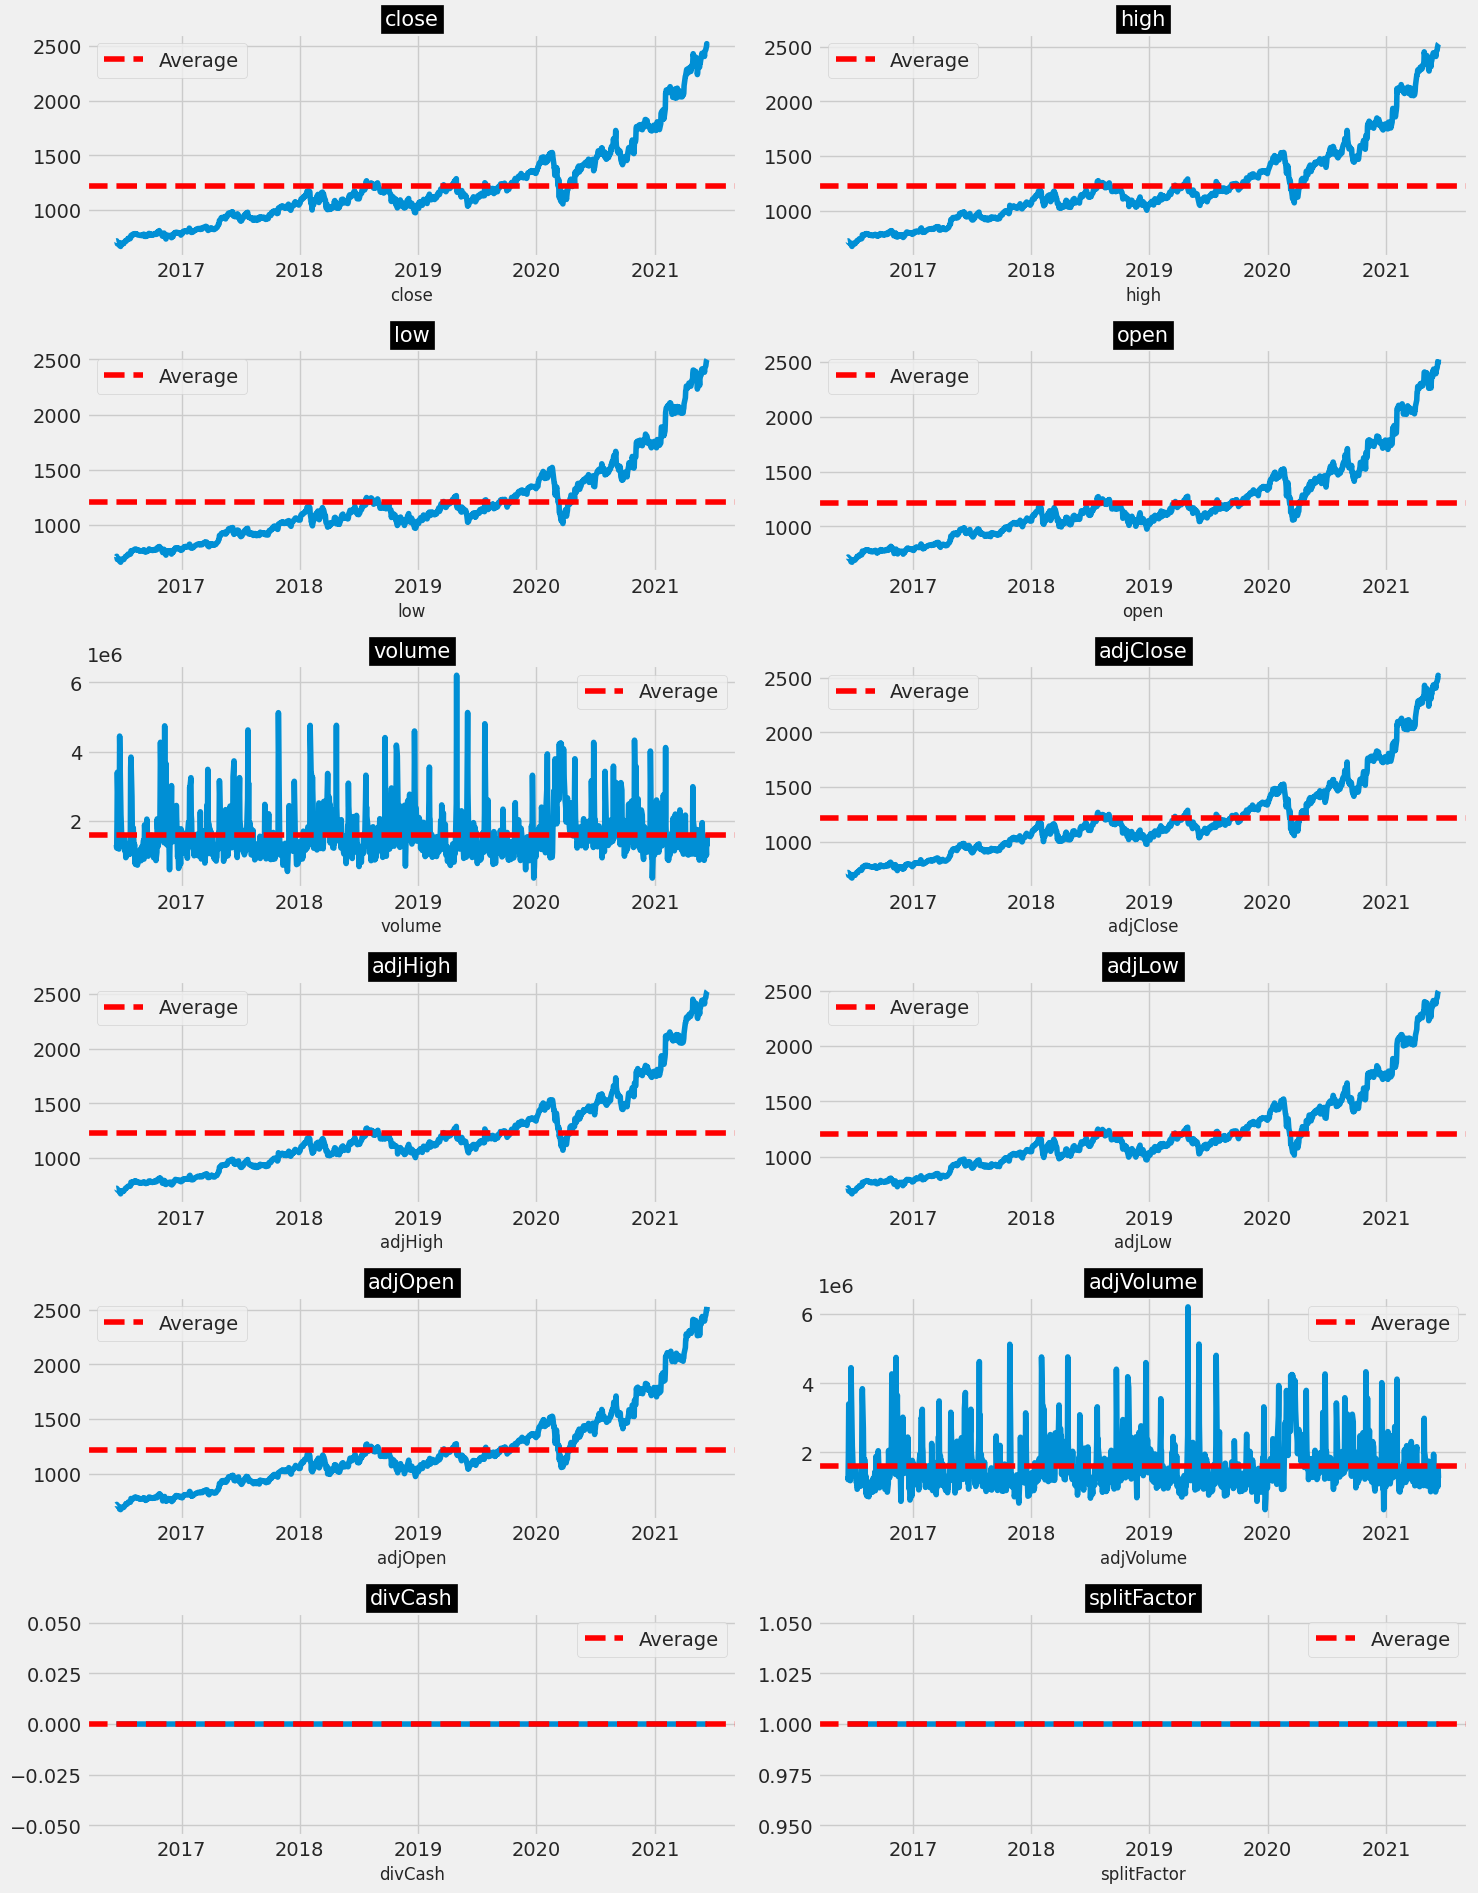

In [8]:
!pip install ta

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
%matplotlib inline

from datetime import datetime

from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, LSTM
import ta
import warnings
warnings.filterwarnings("ignore")
from datetime import date

from google.colab import files
import pandas as pd

print("CSV 파일을 업로드하세요.")
uploaded = files.upload()

for file_name in uploaded.keys():
    stock_data = pd.read_csv(file_name)
    stock_data = pd.DataFrame(stock_data)

stock_data
stock_data.info()
stock_data.describe()
stock_data = stock_data.drop(['symbol'],axis=1)### removing the stock symbol information from the dataset.

### spliting the values in the 'date' column by the space character (" ") using the str.split() method
### The parameter n = 1 indicates that the splitting should happen only once
### expand = True ensures that the split parts are expanded into separate columns.
stock_data['date']= stock_data['date'].str.split(" ", n = 1, expand = True)[0]
###The selected date part is then converted to a datetime format using
stock_data['date']= pd.to_datetime(stock_data['date'])
stock_data

# Convert 'date' column to datetime format
stock_data['date'] = pd.to_datetime(stock_data['date'])

# Set 'date' as the DateTime index
stock_data.set_index('date', inplace=True)

plt.rcParams['font.size'] = 14
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (20, 10)
colors = plt.rcParams["axes.prop_cycle"]()
a1 = 3  # number of rows
a2 = 2  # number of columns
a3 = 1  # initialize plot counter

# Set the figure size of the plot
fig = plt.figure(figsize=(18, 18))

# Specify the columns to plot
columns_to_plot = ['close', 'high', 'low', 'open', 'volume']

# Loop through each column to generate a subplot
for column in columns_to_plot:
    color = next(colors)["color"]
    # Generate a subplot with the given dimensions
    plt.subplot(a1, a2, a3)
    # Plot the data in a line graph, with different colors for each line
    plt.plot(stock_data.groupby(stock_data.index.month_name(), sort=False).mean()[column], color=color, marker='o')
    # Remove the top and right borders
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    # Rotate the x-tick labels by 45 degrees
    plt.xticks(rotation=45)
    # Set the title, x-axis label, y-axis label, and legend
    plt.title(f"Google Month - Average {column} figures", fontsize=18)
    plt.xlabel('Months')
    plt.ylabel(column)
    plt.legend([column])
    # Increment the subplot counter
    a3 = a3 + 1

# Adjust the layout of the plot
plt.tight_layout()
# Show the plot
plt.show()

plt.rcParams['font.size'] = 14
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (18, 10)
colors = plt.rcParams["axes.prop_cycle"]()
b1 = 3  # number of rows
b2 = 2  # number of columns
b3 = 1  # initialize plot counter

# Set the figure size of the plot
fig = plt.figure()

# Specify the columns to plot
columns_to_plot = ['close', 'high', 'low', 'open', 'volume']

# Loop through each column to generate a subplot
for column in columns_to_plot:
    color = next(colors)["color"]
    # Generate a subplot with the given dimensions
    plt.subplot(b1, b2, b3)
    # Plot the data in a line graph, with different colors for each line
    plt.plot(stock_data.groupby(stock_data.index.day_name(), sort=False)[column].mean(), color=color, marker='o')
    # Remove the top and right borders
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    # Rotate the x-tick labels by 45 degrees
    plt.xticks(rotation=45)
    # Set the title, x-axis label, y-axis label, and legend
    plt.title(f"Average {column} by Day of Week", fontsize=16)
    plt.xlabel('Day of Week')
    plt.ylabel(column)
    plt.legend([column])
    # Increment the subplot counter
    b3 += 1

# Adjust the layout of the plot
plt.tight_layout()
# Show the plot
plt.show()

plt.figure(figsize=(15, 25))
for idx, column in enumerate(stock_data):
    plt.subplot(8, 2, idx + 1)
    plt.plot(stock_data.index.values, stock_data[column])
    #Adding a horizontal line for the average of the column
    plt.axhline(stock_data[column].mean(), color='red', linestyle='--', label='Average')
    plt.title(column, backgroundcolor='black', color='white', fontsize=15)
    plt.xlabel(column, size=12)
    plt.legend()
plt.tight_layout()
plt.show()
